In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder , StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans , AgglomerativeClustering , DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors 

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from ipywidgets import interact
import ipywidgets as w 

import warnings 
warnings.filterwarnings('ignore')

In [262]:
df = pd.read_csv('/content/DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv' , sep =';')

df.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure  Education  Son  \
0                 239.554  ...                     0          1    2   
1                 239.554  ...                     1          1    1   
2                 239.554  ...                     0          1    0   
3                 239.554  ...                     0          1    2   
4                 239.554  ...                     0          1    2   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   

   Absenteeism time in hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2  

[5 rows x 21 columns]

In [263]:
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [264]:
for i in df.columns:

  print(f'Unique Value in {i}')
  print(f'{df[i].unique()}\n')
  print('---------------------------------------------------------------------------------------------------------------------------')


Unique Value in ID
[11 36  3  7 10 20 14  1 24  6 33 18 30  2 19 27 34  5 15 29 28 13 22 17
 31 23 32  9 26 21  8 25 12 16  4 35]

---------------------------------------------------------------------------------------------------------------------------
Unique Value in Reason for absence
[26  0 23  7 22 19  1 11 14 21 10 13 28 18 25 24  6 27 17  8 12  5  9 15
  4  3  2 16]

---------------------------------------------------------------------------------------------------------------------------
Unique Value in Month of absence
[ 7  8  9 10 11 12  1  2  3  4  5  6  0]

---------------------------------------------------------------------------------------------------------------------------
Unique Value in Day of the week
[3 4 5 6 2]

---------------------------------------------------------------------------------------------------------------------------
Unique Value in Seasons
[1 4 2 3]

-----------------------------------------------------------------------------------------------

In [265]:
df1 = df.copy()

# EDA

In [266]:
a = ['Month of absence' , 'Seasons' , 'Age' , 'Hit target']

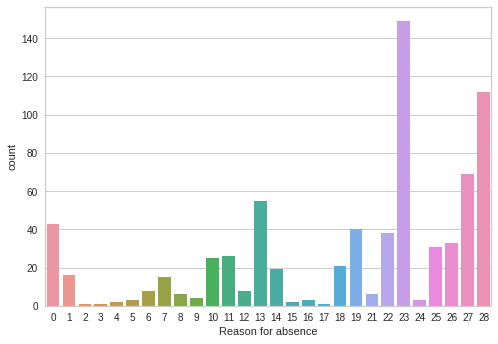

In [267]:
# No Reasons of employees absentism
sns.countplot(x = df['Reason for absence'] );

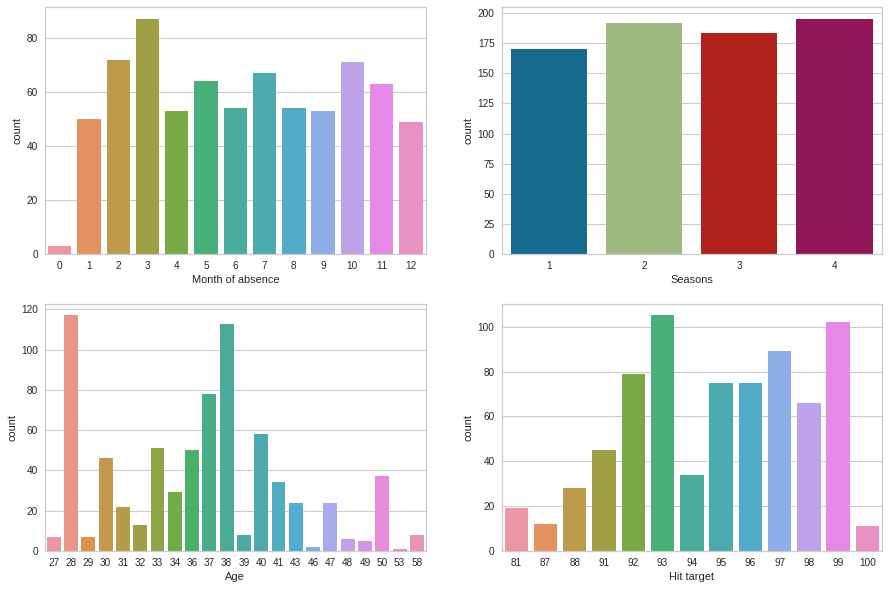

In [268]:
# Countplot of Employees Absentism w.r.t ['Month of absence' , 'Seasons' , 'Age' , 'Hit target']
fig , axes = plt.subplots(2,2, figsize = (15 , 10))
for i , ax  in zip(a , axes.flatten()):
  graph = sns.countplot(x = df[i] , ax =ax)

  # for bar in graph.patches:
  #   values = bar.get_height()
  #   x = bar.get_height() + bar.get_width()/2
  #   y = bar.get_height()
  #   graph.annotate(values , (x,y) , va = 'bottom' , ha = 'center')

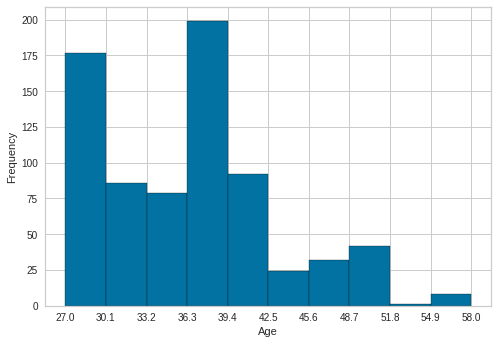

In [269]:
# Distribution of employees absentism with respect to age
n , bins , patches = plt.hist(df['Age'] , edgecolor = 'black');
plt.xticks(bins);
plt.ylabel('Frequency')
plt.xlabel('Age');

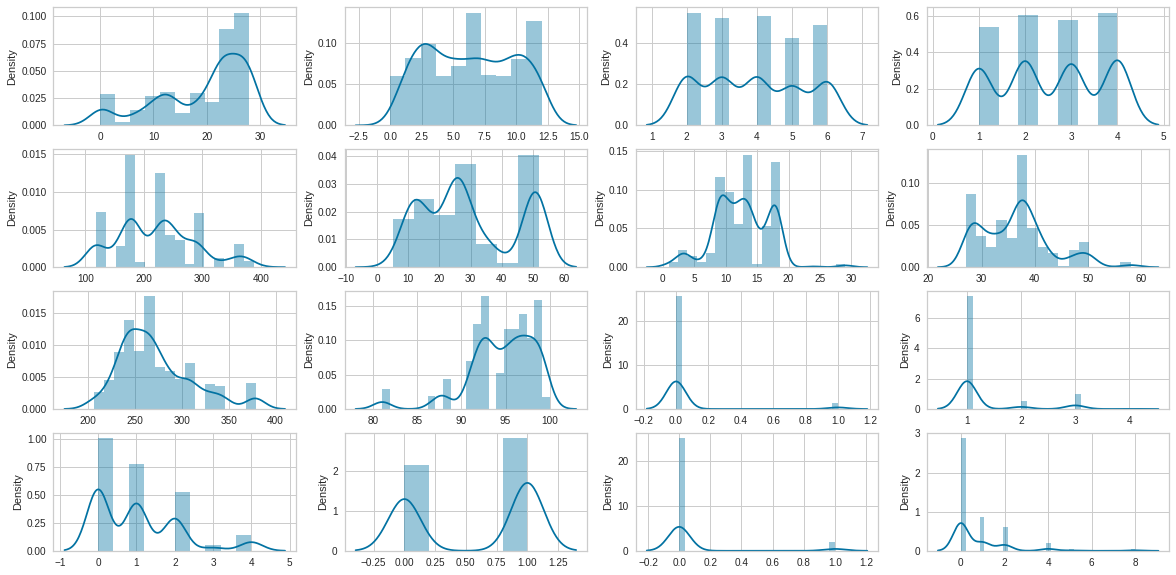

In [270]:
# DistributionPlot for all columns
fig , axes = plt.subplots(4,4,figsize=(20,10))
for i , ax in zip(col , axes.flatten()):
  sns.distplot(x = df[i] , ax = ax)

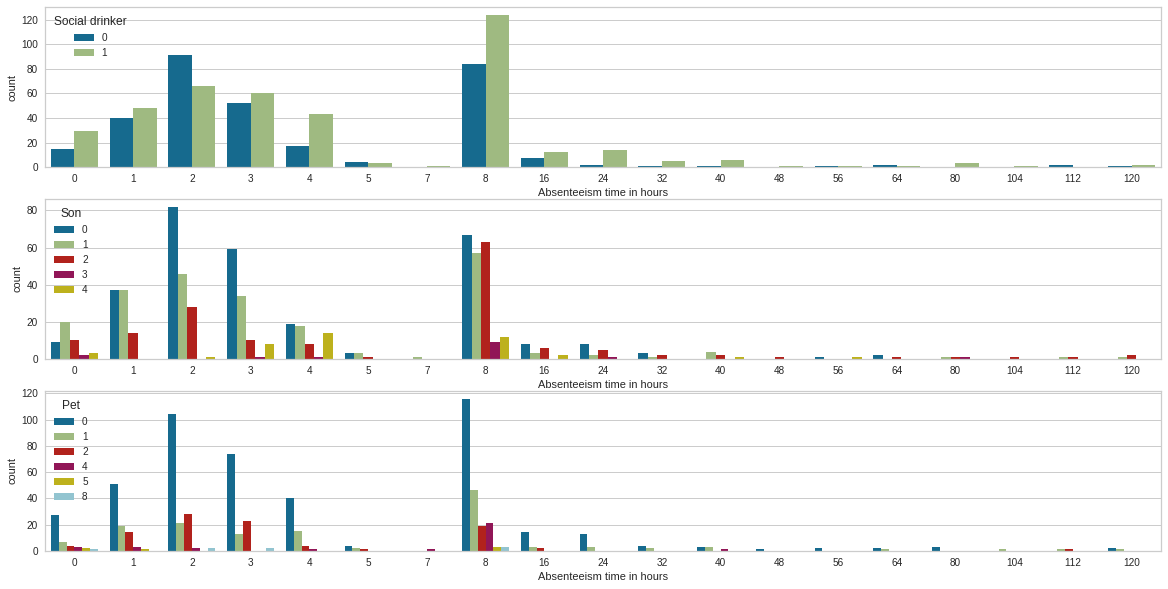

In [271]:
# Clustered Chart for Absenteeism time in hours v/s ['Social drinker' , 'Son' , 'Pet']
fig , axes = plt.subplots(3,1,figsize=(20,10))
for i , ax in zip(['Social drinker' , 'Son' , 'Pet'] , axes.flatten()):

  sns.countplot(x = df['Absenteeism time in hours'] , hue = df[i] , ax = ax);

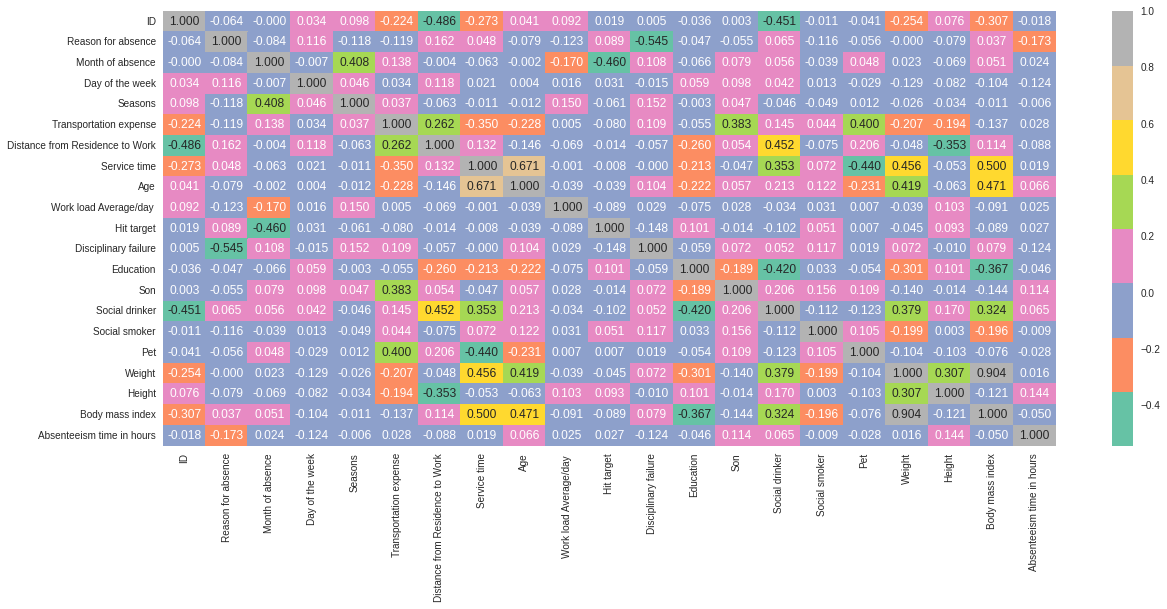

In [272]:
# Correlation Plot
plt.figure(figsize = (20,8))
sns.heatmap(df.corr() , annot = True , fmt = '0.3f' , cmap = 'Set2')

## Find Outlier

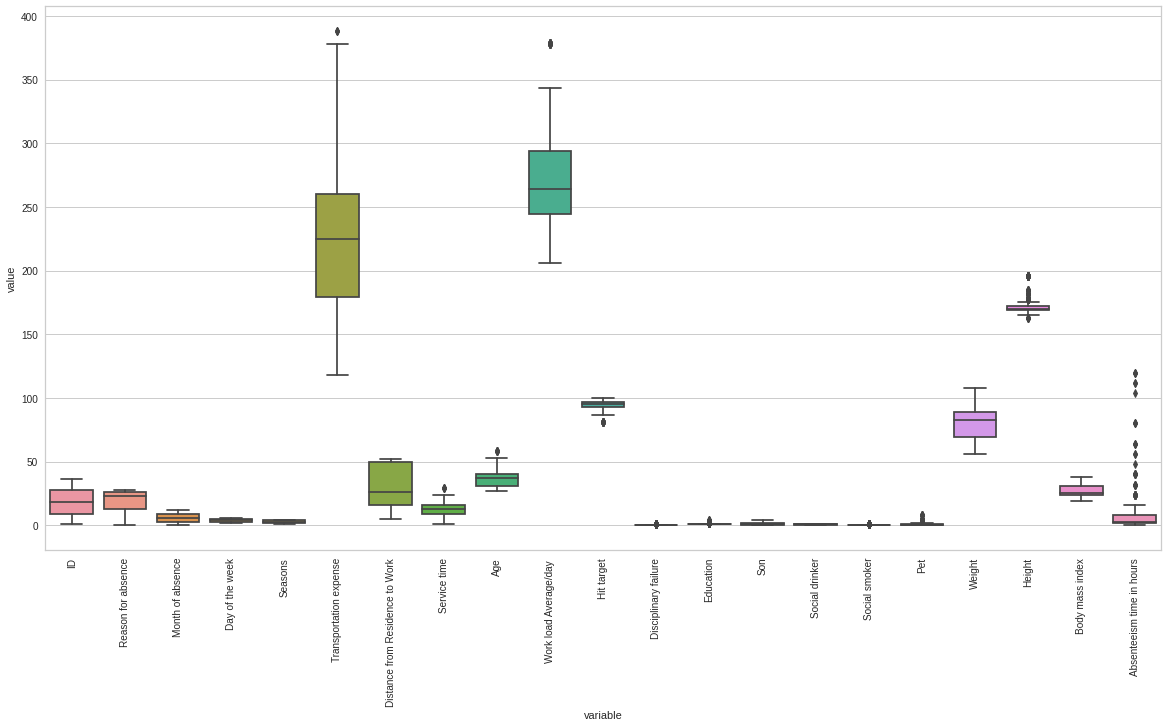

In [273]:
# Outlier check for each columns
plt.figure(figsize = (20 ,10))
sns.boxplot(x = 'variable' , y = 'value' , data = pd.melt(df));
plt.xticks(rotation = 90);

In [274]:
for i in df.columns:

  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)

  iqr = q3 - q1

  LF = q1 - (1.5 * iqr)
  UF = q3 + (1.5 * iqr)

  for j in df[i]:

    if (j > UF) or (j < LF):

      df[i].replace(j , df[i].median() , inplace = True)


# Supervised Model To get best feature

In [340]:
df_fea = df.copy()

In [341]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [342]:
y = df_fea.iloc[: , -1]
x = df_fea.iloc[: , :-1]

The best parameters are {'n_estimators': 1000} having a score of 0.41891891891891897


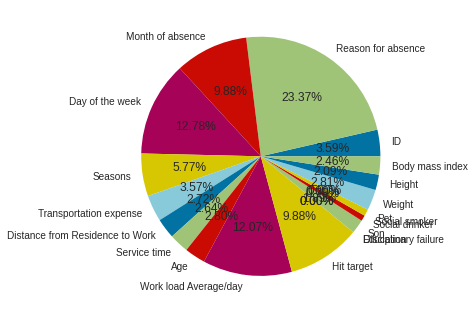

In [343]:
rfc = RandomForestClassifier()
parameters =  {
    'n_estimators' : [1000] ,
       
    }

mygridcv = GridSearchCV(estimator = rfc , param_grid = parameters , cv = 5).fit(x , y)
print(f'The best parameters are {mygridcv.best_params_} having a score of {mygridcv.best_score_}')
plt.pie(mygridcv.best_estimator_.feature_importances_ , labels = x.columns, autopct = '%0.2f%%');


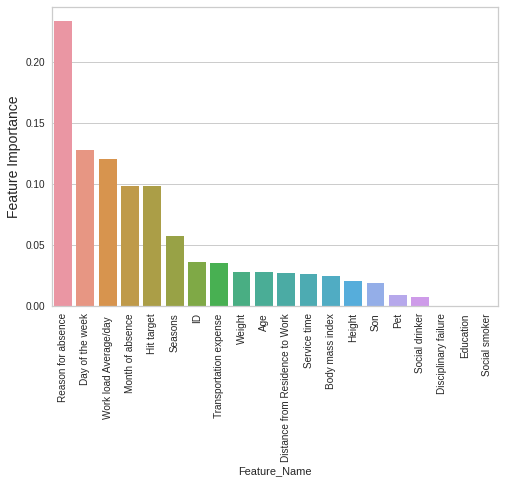

In [344]:
df_fea_2 = pd.DataFrame({'Feature_Name' : x.columns , 'Feature Importance' : mygridcv.best_estimator_.feature_importances_ })
df_fea_2.sort_values(by = 'Feature Importance' , ascending = False , inplace = True)

sns.barplot(x = df_fea_2['Feature_Name'] , y = df_fea_2['Feature Importance'] ,)
plt.xticks(rotation = 90);
plt.ylabel('Feature Importance' , fontsize = 14);

In [345]:
df_fea_2.head(10)

Feature_Name  Feature Importance
1       Reason for absence            0.233693
3          Day of the week            0.127833
9   Work load Average/day             0.120686
2         Month of absence            0.098839
10              Hit target            0.098778
4                  Seasons            0.057651
0                       ID            0.035864
5   Transportation expense            0.035732
17                  Weight            0.028130
8                      Age            0.028038

In [346]:
df1 = df[df_fea_2['Feature_Name'].head(10)]
df1

Reason for absence  Day of the week  Work load Average/day   \
0                    26                3                 239.554   
1                     0                3                 239.554   
2                    23                4                 239.554   
3                     7                5                 239.554   
4                    23                5                 239.554   
..                  ...              ...                     ...   
735                  14                3                 264.604   
736                  11                3                 264.604   
737                   0                3                 271.219   
738                   0                4                 271.219   
739                   0                6                 271.219   

     Month of absence  Hit target  Seasons  ID  Transportation expense  \
0                   7          97        1  11                     289   
1                   7          97        1  36                     118   
2                   7          97        1   3                     179   
3                   7          97        1   7                     279   
4                   7          97        1  11                     289   
..                ...         ...      ...  ..                     ...   
735                 7          93        1  11                     289   
736                 7          93        1   1                     235   
737                 0          95        1   4                     118   
738                 0          95        2   8                     231   
739                 0          95        3  35                     179   

     Weight  Age  
0        90   33  
1        98   50  
2        89   38  
3        68   39  
4        90   33  
..      ...  ...  
735      90   33  
736      88   37  
737      98   40  
738     100   39  
739      77   53  

[740 rows x 10 columns]

## Unsupervised MODEL

## KMean

In [347]:
def kmean_algo1(features ,scaler = MinMaxScaler() ,components = 4 , dimension_reduction = 'pca' , k = 3):
    #features = list(features)
    scaled_values = scaler.fit(df[features]).transform(df[features])
    
    X1_scaled = scaled_values[:,1:]
    #Y1_scaled = scaled_values[:,0]
    
    components = min(components , len(df))
    
    if dimension_reduction == 'pca' :
        
        new_dim = PCA(n_components = components).fit_transform(X1_scaled)
    
    # elif dimension_reduction == 'lda' :
        
    #     X1_scaled_train , X1_scaled_test , Y1_scaled_train , Y1_scaled_test = train_test_split(X1_scaled , Y1_scaled , test_size = 0.2 , random_state =42)
        
    #     new_dim = LinearDiscriminantAnalysis(n_components = components).fit_transform(X1_scaled_train , Y1_scaled_train)
    
    else:
        new_dim = scaled_values
        
        
    clusters = KMeans(n_clusters =  k, random_state = 42).fit_predict(new_dim)

    global new_df_km
    new_df_km = pd.DataFrame(new_dim)
    new_df_km[f'clusters{dimension_reduction}'] = clusters
    
    sil_score = silhouette_score(new_df_km , new_df_km[f'clusters{dimension_reduction}'])
    print('Silhouette Score : %0.3f'%sil_score)    
    sns.pairplot(new_df_km, hue=f'clusters{dimension_reduction}', diag_kind = 'hist', diag_kws={'alpha':0.5}, vars=[q for q in new_df_km.columns if q != f'clusters{dimension_reduction}'])
    
    return new_df_km

In [348]:
df1.head()

Reason for absence  Day of the week  Work load Average/day   \
0                  26                3                 239.554   
1                   0                3                 239.554   
2                  23                4                 239.554   
3                   7                5                 239.554   
4                  23                5                 239.554   

   Month of absence  Hit target  Seasons  ID  Transportation expense  Weight  \
0                 7          97        1  11                     289      90   
1                 7          97        1  36                     118      98   
2                 7          97        1   3                     179      89   
3                 7          97        1   7                     279      68   
4                 7          97        1  11                     289      90   

   Age  
0   33  
1   50  
2   38  
3   39  
4   33

In [349]:
scaler = MinMaxScaler()
df1_scaled = pd.DataFrame(scaler.fit_transform(df1) , columns = df1.columns)
df1_scaled.head()

Reason for absence  Day of the week  Work load Average/day   \
0            0.928571             0.25                0.244925   
1            0.000000             0.25                0.244925   
2            0.821429             0.50                0.244925   
3            0.250000             0.75                0.244925   
4            0.821429             0.75                0.244925   

   Month of absence  Hit target  Seasons        ID  Transportation expense  \
0          0.583333    0.769231      0.0  0.285714                0.657692   
1          0.583333    0.769231      0.0  1.000000                0.000000   
2          0.583333    0.769231      0.0  0.057143                0.234615   
3          0.583333    0.769231      0.0  0.171429                0.619231   
4          0.583333    0.769231      0.0  0.285714                0.657692   

     Weight       Age  
0  0.653846  0.230769  
1  0.807692  0.884615  
2  0.634615  0.423077  
3  0.230769  0.461538  
4  0.653846  0.230769

In [350]:
df1_scaled.head()

Reason for absence  Day of the week  Work load Average/day   \
0            0.928571             0.25                0.244925   
1            0.000000             0.25                0.244925   
2            0.821429             0.50                0.244925   
3            0.250000             0.75                0.244925   
4            0.821429             0.75                0.244925   

   Month of absence  Hit target  Seasons        ID  Transportation expense  \
0          0.583333    0.769231      0.0  0.285714                0.657692   
1          0.583333    0.769231      0.0  1.000000                0.000000   
2          0.583333    0.769231      0.0  0.057143                0.234615   
3          0.583333    0.769231      0.0  0.171429                0.619231   
4          0.583333    0.769231      0.0  0.285714                0.657692   

     Weight       Age  
0  0.653846  0.230769  
1  0.807692  0.884615  
2  0.634615  0.423077  
3  0.230769  0.461538  
4  0.653846  0.230769

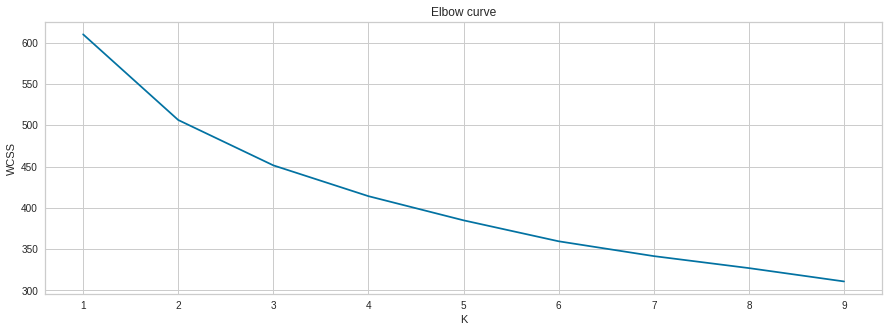

In [351]:
WCSS = []
for i in range(1,10):
    km = KMeans(n_clusters = i ,random_state = 42).fit(df1_scaled)
    WCSS.append(km.inertia_)
    
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 10), WCSS)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('Elbow curve');

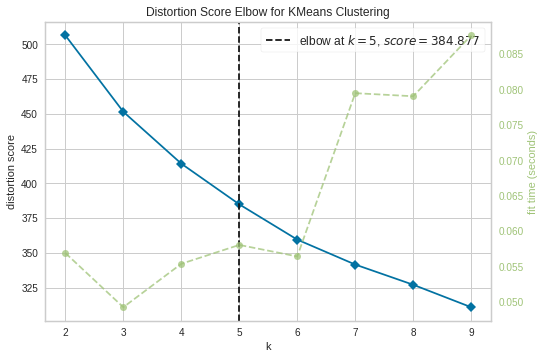

In [352]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model , k= (2,10))
visualizer.fit(df1_scaled)
visualizer.show()

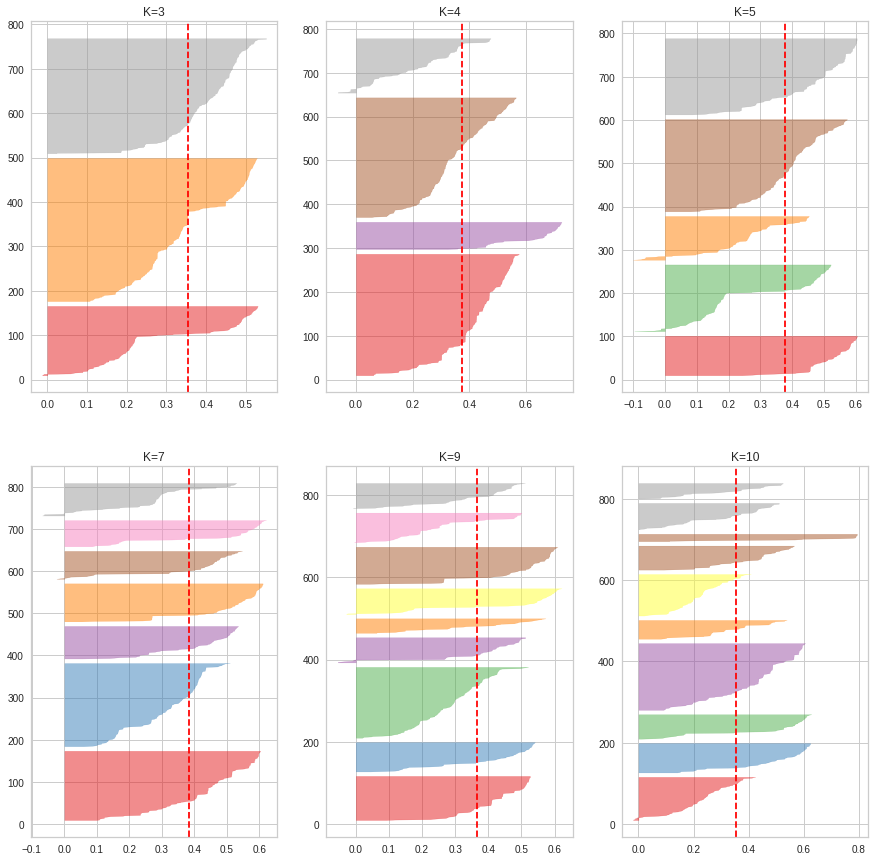

In [353]:
fig ,axes = plt.subplots(2,3,figsize=(15,15))
for i , ax in zip([3,4,5,7,9,10] , axes.flatten()):
    km1 = KMeans(n_clusters = i ,random_state = 42)
    ax.set_title(f'K={i}')
    visualizer = SilhouetteVisualizer(km1 , color = 'yellowbrick' , ax = ax)
    visualizer.fit(df1)
    

In [354]:
for i , ax in zip([3,4,5,7,9,10] , axes.flatten()):
    km1 = KMeans(n_clusters = i ,random_state = 42)
    cluster_labels = km1.fit_predict(df1_scaled)
    
    silhouette_avg = silhouette_score(df1_scaled , cluster_labels)
    
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.14761227960265016
For n_clusters = 4 The average silhouette_score is : 0.15364798986249256
For n_clusters = 5 The average silhouette_score is : 0.15066277971858694
For n_clusters = 7 The average silhouette_score is : 0.15172288134464224
For n_clusters = 9 The average silhouette_score is : 0.15916187794681322
For n_clusters = 10 The average silhouette_score is : 0.15930870308904801


In [355]:
pc_km = PCA(n_components = 5)
pc_km_tr = pc_km.fit_transform(df1_scaled)

exp_var = pc_km.explained_variance_ratio_
exp_var

array([0.21012513, 0.16273552, 0.13792632, 0.11857015, 0.10330926])

In [356]:
# looking for explained variance for n_components = 5
np.sum(exp_var)

0.7326663896680509

In [357]:
col = df1_scaled.columns.tolist()

Silhouette Score : 0.510


0         1         2         3         4  clusterspca
0    0.489064  0.281657 -0.292219 -0.110746  0.173363            4
1    0.450683  0.175601  0.616339  0.550006  0.452200            0
2    0.525348  0.118633 -0.353075  0.262865  0.148118            4
3    0.422179 -0.230116 -0.455651 -0.079073  0.225913            4
4    0.426629 -0.166005 -0.447812  0.017389  0.228293            4
..        ...       ...       ...       ...       ...          ...
735  0.411898  0.303239 -0.287750 -0.138227  0.254051            4
736  0.469956  0.372601 -0.408038  0.052958  0.181189            4
737  0.818134  0.266447 -0.025012  0.415855 -0.178517            1
738  0.466637  0.044395 -0.178325  0.312779 -0.280648            1
739  0.009797 -0.656255  0.492804  0.495125 -0.086246            0

[740 rows x 6 columns]

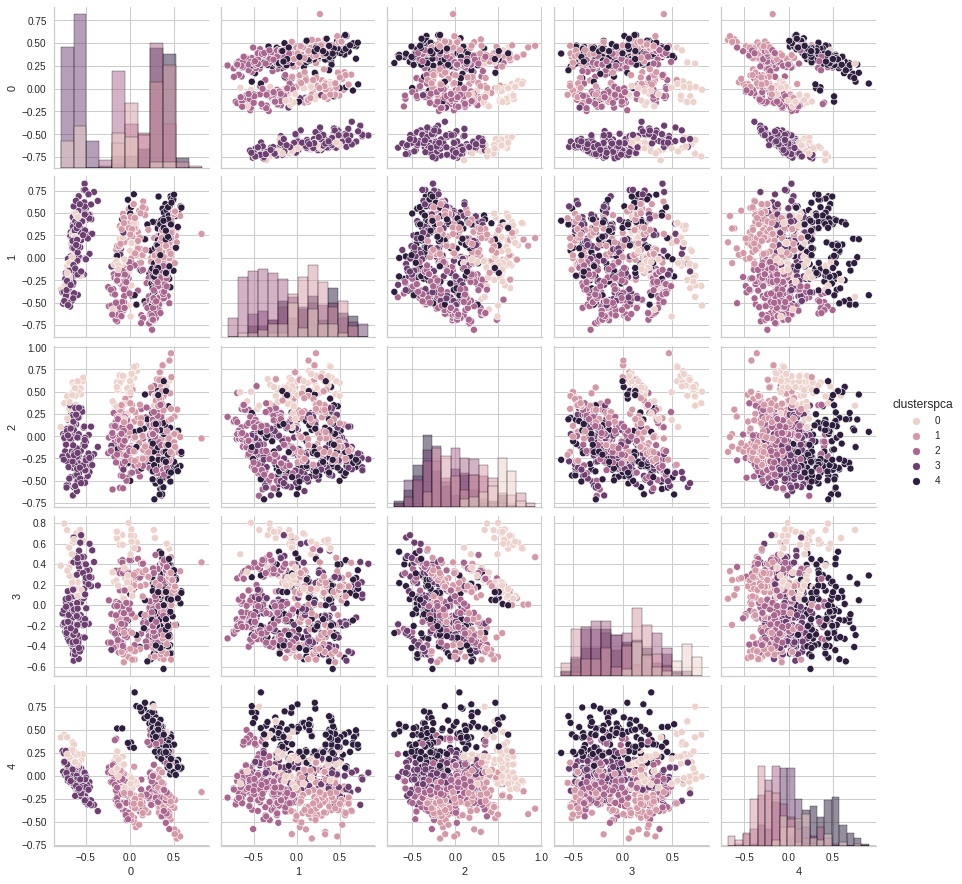

In [358]:
# (features ,scaler = MinMaxScaler() ,components = 4 , dimension_reduction = 'pca' , k = 3)
kmean_algo1(col , components = 5 , k = 5) 

In [359]:
new_df_km_clusterspca = new_df_km['clusterspca']

In [360]:
new_df_km_pca = new_df_km.copy()

## Hierarchical Clustering

In [361]:
def s_score(distance, linkage):
    agc = AgglomerativeClustering(n_clusters=10, affinity=distance, linkage=linkage)
    agc.fit_predict(df1_scaled)
    score = silhouette_score(df1_scaled, agc.labels_, random_state=42)
    return score

In [362]:
distances = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average', 'single']

scoring = {'dist':[], 'link':[], 'sScore':[]}
for i in distances:
    for j in linkages:
        try:
            score = s_score(i, j)
            scoring['dist'].append(i)
            scoring['link'].append(j)
            scoring['sScore'].append(score)
        except:
            scoring['dist'].append(i)
            scoring['link'].append(j)
            scoring['sScore'].append(np.nan)
scoringDf = pd.DataFrame(scoring)

In [363]:
scoringDf.dropna(axis=0, inplace=True)
scoringDf[scoringDf['sScore'] == max(scoringDf['sScore'])]

dist  link    sScore
0  euclidean  ward  0.128299

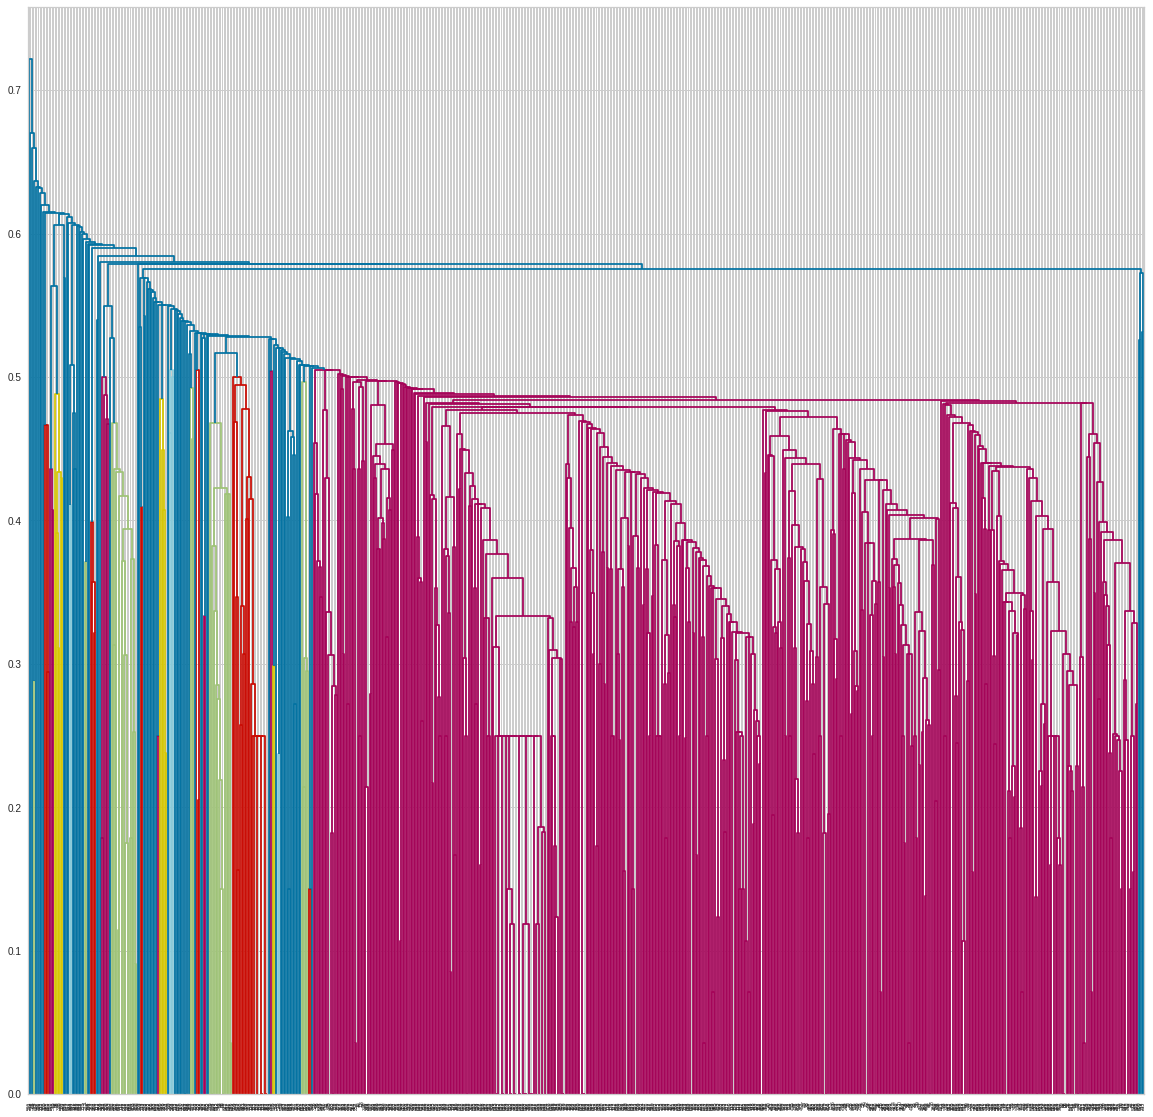

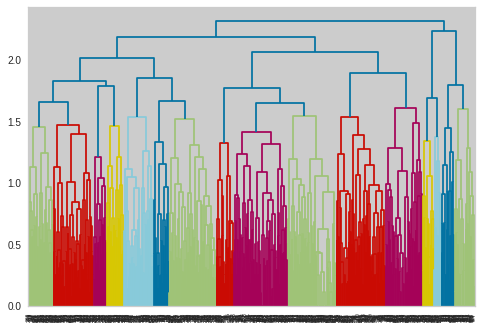

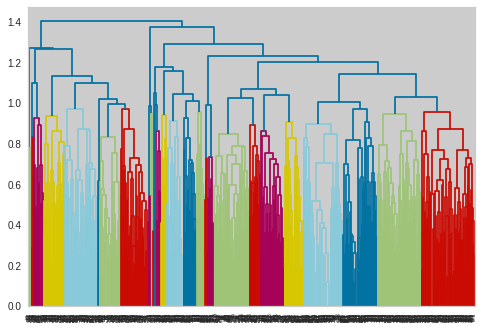

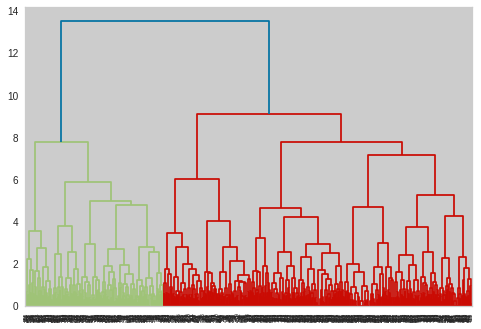

In [364]:
plt.figure(figsize = (20 , 20))
for i in ['single' , 'complete' , 'average' , 'ward'] :
    
    Den = sch.dendrogram(sch.linkage(df1_scaled , method = i) , labels = df1_scaled.index )
    plt.show()

In [365]:
for i , ax in zip([3,4,5,7,9] , axes.flatten()):

    hc1 = AgglomerativeClustering(n_clusters = i , affinity = 'euclidean' ,  linkage = 'ward')
    cluster_labels = hc1.fit_predict(df1_scaled)
    
    silhouette_avg = silhouette_score(df1_scaled , cluster_labels)
    
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.12578694768726525
For n_clusters = 4 The average silhouette_score is : 0.10857025368060806
For n_clusters = 5 The average silhouette_score is : 0.11966048608254248
For n_clusters = 7 The average silhouette_score is : 0.125496719798782
For n_clusters = 9 The average silhouette_score is : 0.12615820398212615


In [367]:
def Hierarchical_algo1(features ,scaler = MinMaxScaler() ,components = 4 , dimension_reduction = 'pca' , k = 3 , affinity = 'euclidean' , linkage = 'ward'):
    features = list(features)
    scaled_values = scaler.fit(df[features]).transform(df[features])
    
    X1_scaled = scaled_values[:,1:]
    #Y1_scaled = scaled_values[:,0]
    
    components = min(components , len(df))
    
    if dimension_reduction == 'pca' :
        
        new_dim = PCA(n_components = components).fit_transform(X1_scaled)
    
    # elif dimension_reduction == 'lda' :
        
    #     X1_scaled_train , X1_scaled_test , Y1_scaled_train , Y1_scaled_test = train_test_split(X1_scaled , Y1_scaled , test_size = 0.2 , random_state =42)
        
    #     new_dim = LinearDiscriminantAnalysis(n_components = components).fit_transform(X1_scaled_train , Y1_scaled_train)
    
    else:
        new_dim = scaled_values
        
        
    clusters = AgglomerativeClustering(n_clusters =  k, affinity = 'euclidean' ,  linkage = linkage).fit_predict(new_dim)
    
    global new_df_hc

    new_df_hc = pd.DataFrame(new_dim)
    new_df_hc[f'clusters{dimension_reduction}'] = clusters
    
    sil_score = silhouette_score(new_df_hc , new_df_hc[f'clusters{dimension_reduction}'])
    print('Silhouette Score : %0.3f'%sil_score)
    
    sns.pairplot(new_df_hc, hue=f'clusters{dimension_reduction}', diag_kind = 'hist', diag_kws={'alpha':0.5}, vars=[q for q in new_df_hc.columns if q != f'clusters{dimension_reduction}'])


Silhouette Score : 0.494


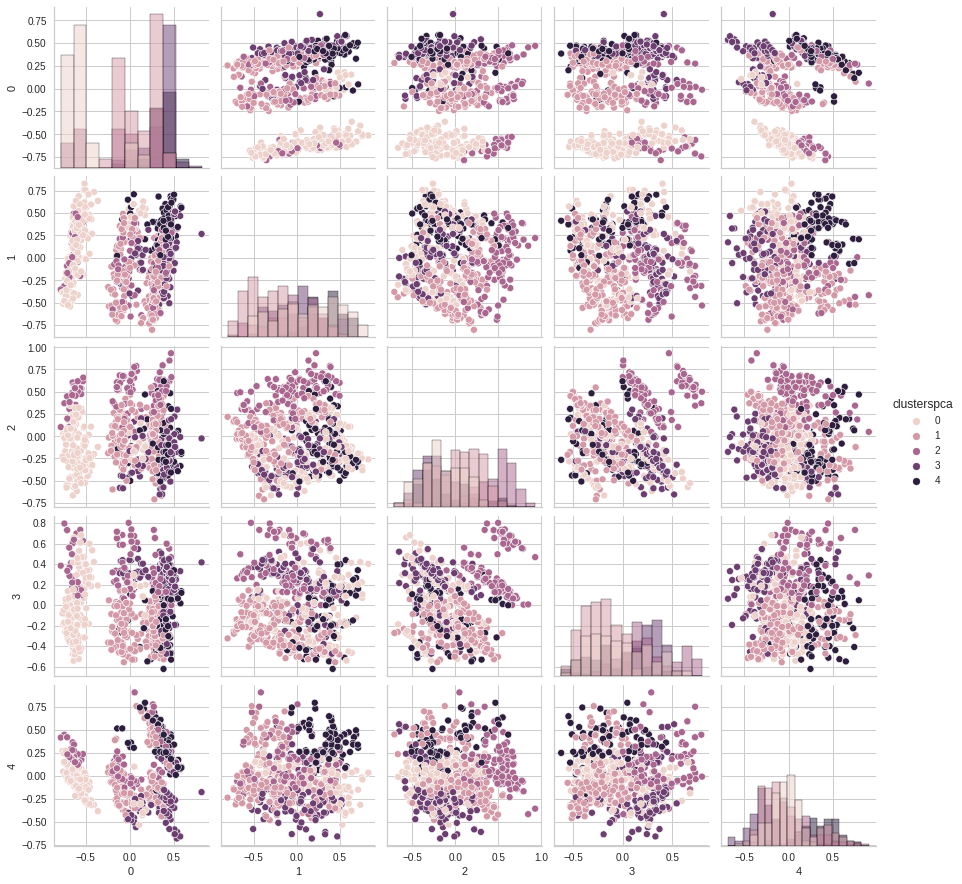

In [368]:
# (features ,scaler = MinMaxScaler() ,components = 4 , dimension_reduction = 'pca' , k = 3 , linkage = 'ward')

Hierarchical_algo1(col , components = 5 , k = 5)

In [369]:
new_df_hc_clusterspca = new_df_hc['clusterspca']

In [370]:
new_df_hc_pca = new_df_hc.copy()

## DBSCAN Clustering

In [371]:
NN = NearestNeighbors(n_neighbors = 2)
NN_n = NN.fit(df1_scaled)

distances , indices = NN_n.kneighbors(df1_scaled)

In [372]:
distances = np.sort(distances , axis = 0)
distances_1 = distances[: , 1]

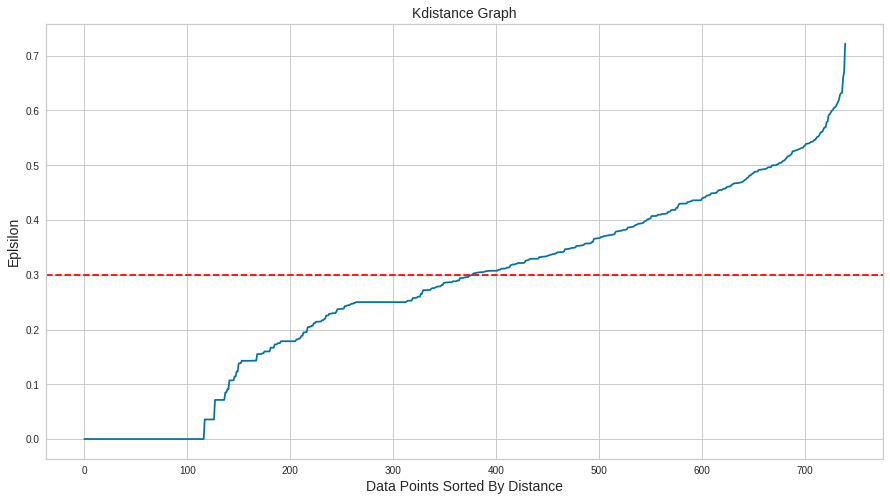

In [385]:
plt.figure(figsize = (15,8))
plt.plot(distances_1);
plt.axhline(y = 0.3 , color = 'red' , linestyle = '--');
plt.title('Kdistance Graph',fontsize = 14)
plt.xlabel('Data Points Sorted By Distance',fontsize = 14);
plt.ylabel('Eplsilon',fontsize = 14);

In [374]:
def DBSCAN_algo1(features , eps , min_samples , scaler = MinMaxScaler() ,components = 4 , dimension_reduction = 'pca' ):



  features = list(features)
  scaled_values = scaler.fit(df[features]).transform(df[features])

  X1_scaled = scaled_values[:,1:]
  #Y1_scaled = scaled_values[:,0]

  components = min(components , len(df))

  if dimension_reduction == 'pca' :
      
      new_dim = PCA(n_components = components).fit_transform(X1_scaled)

  # elif dimension_reduction == 'lda' :
      
  #     X1_scaled_train , X1_scaled_test , Y1_scaled_train , Y1_scaled_test = train_test_split(X1_scaled , Y1_scaled , test_size = 0.2 , random_state =42)
      
  #     new_dim = LinearDiscriminantAnalysis(n_components = components).fit_transform(X1_scaled_train , Y1_scaled_train)

  else:
      new_dim = scaled_values
      
      
  dbscan = DBSCAN(eps = eps , min_samples = min_samples)
  dbscan.fit(new_dim)

  global new_df_db
  new_df_db = pd.DataFrame(new_dim)
  new_df_db[f'clusters{dimension_reduction}'] = dbscan.labels_

  print('Cluster value counts',new_df_db[f'clusters{dimension_reduction}'].value_counts())
  sns.pairplot(new_df_db, hue=f'clusters{dimension_reduction}', diag_kind = 'hist', diag_kws={'alpha':0.5}, vars=[q for q in new_df_db.columns if q != f'clusters{dimension_reduction}'])

  sil_score = silhouette_score(new_df_db , dbscan.labels_)
  print('Silhouette Score : %0.3f'%sil_score)    
      
  def sol(r):
      
      for i in range(1 , 25):
          
        model = DBSCAN(eps = eps , min_samples = i)
        cluster_labels = model.fit_predict(r) # wont take discrete for training and predicting

        x = cluster_labels + 2
        y = np.bincount(x)
        z = np.nonzero(y)[0]

        results = list(zip(z , y[z]))

        print(f'eps : {eps} | min_samples : {i} | Obtained Clustering : {results}\n')

  return sol(new_df_db)


        
        

Cluster value counts -1    552
 0     66
 2     51
 1     49
 3     22
Name: clusterspca, dtype: int64
Silhouette Score : 0.401
eps : 0.3 | min_samples : 1 | Obtained Clustering : [(2, 246), (3, 6), (4, 13), (5, 1), (6, 3), (7, 1), (8, 92), (9, 66), (10, 27), (11, 5), (12, 1), (13, 49), (14, 25), (15, 7), (16, 51), (17, 1), (18, 22), (19, 32), (20, 2), (21, 18), (22, 1), (23, 9), (24, 21), (25, 1), (26, 1), (27, 7), (28, 1), (29, 3), (30, 1), (31, 1), (32, 3), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)]

eps : 0.3 | min_samples : 2 | Obtained Clustering : [(1, 33), (2, 246), (3, 6), (4, 13), (5, 3), (6, 92), (7, 66), (8, 27), (9, 5), (10, 49), (11, 25), (12, 7), (13, 51), (14, 22), (15, 32), (16, 2), (17, 18), (18, 9), (19, 21), (20, 7), (21, 3), (22, 3)]

eps : 0.3 | min_samples : 3 | Obtained Clustering : [(1, 35), (2, 246)

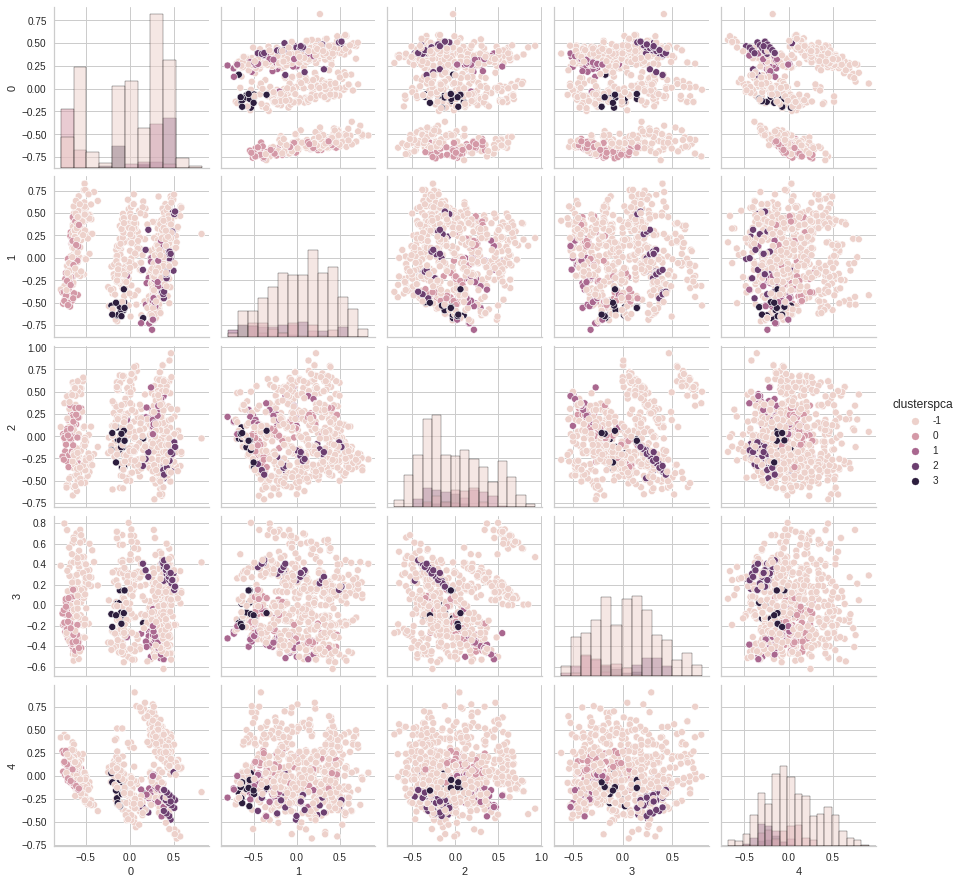

In [384]:
# (features , eps , min_samples , scaler = MinMaxScaler() ,components = 4 , dimension_reduction = 'pca' )

DBSCAN_algo1(col , 0.3 , 21 , components = 5)

In [386]:
new_df_db_clusterspca = new_df_db['clusterspca']

In [387]:
len(df1_scaled.columns)

10

In [388]:
from tabulate import tabulate

table = [['K - Value' , 5 , 5 , 2] , 
         ['eps' , 'Nan' , 'Nan' , 0.5] ,
         ['Min_samples' , 'Nan' , 'Nan' , 21],
         ['Silhouette score',0.510,0.494,0.401]]

print(tabulate(table , headers = ['Status','K-Mean' , 'Hierarchial' , 'DBSCAN'] ,tablefmt="grid"))

+------------------+----------+---------------+----------+
| Status           |   K-Mean |   Hierarchial |   DBSCAN |
+==================+==========+===============+==========+
| K - Value        |     5    |         5     |    2     |
+------------------+----------+---------------+----------+
| eps              |   nan    |       nan     |    0.5   |
+------------------+----------+---------------+----------+
| Min_samples      |   nan    |       nan     |   21     |
+------------------+----------+---------------+----------+
| Silhouette score |     0.51 |         0.494 |    0.401 |
+------------------+----------+---------------+----------+


In [389]:
df1_scaled.head()

Reason for absence  Day of the week  Work load Average/day   \
0            0.928571             0.25                0.244925   
1            0.000000             0.25                0.244925   
2            0.821429             0.50                0.244925   
3            0.250000             0.75                0.244925   
4            0.821429             0.75                0.244925   

   Month of absence  Hit target  Seasons        ID  Transportation expense  \
0          0.583333    0.769231      0.0  0.285714                0.657692   
1          0.583333    0.769231      0.0  1.000000                0.000000   
2          0.583333    0.769231      0.0  0.057143                0.234615   
3          0.583333    0.769231      0.0  0.171429                0.619231   
4          0.583333    0.769231      0.0  0.285714                0.657692   

     Weight       Age  
0  0.653846  0.230769  
1  0.807692  0.884615  
2  0.634615  0.423077  
3  0.230769  0.461538  
4  0.653846  0.230769

In [391]:
df2 = df.copy()

In [392]:
new_df = pd.concat([df2 , new_df_km_clusterspca] , axis = 1)
new_df.rename(columns = {'clusterspca' : 'km_clusterspca'} , inplace = True)

In [407]:
new_df.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Education  Son  Social drinker  Social smoker  \
0                 239.554  ...          1    2               1              0   
1                 239.554  ...          1    1               1              0   
2                 239.554  ...          1    0               1              0   
3                 239.554  ...          1    2               1              0   
4                 239.554  ...          1    2               1              0   

   Pet  Weight  Height  Body mass index  Absenteeism time in hours  \
0    1      90     172               30                          4   
1    0      98     170               31                          0   
2    0      89     170               31                          2   
3    0      68     168               24                          4   
4    1      90     172               30                          2   

   km_clusterspca  
0               4  
1               0  
2               4  
3               4  
4               4  

[5 rows x 22 columns]

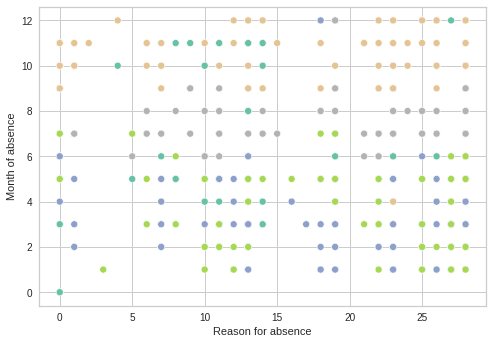

In [410]:
sns.scatterplot(x = new_df['Reason for absence'] , y = new_df['Month of absence'] , c = new_df['km_clusterspca'] , cmap = 'Set2')

In [396]:
new_df.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Education  Son  Social drinker  Social smoker  \
0                 239.554  ...          1    2               1              0   
1                 239.554  ...          1    1               1              0   
2                 239.554  ...          1    0               1              0   
3                 239.554  ...          1    2               1              0   
4                 239.554  ...          1    2               1              0   

   Pet  Weight  Height  Body mass index  Absenteeism time in hours  \
0    1      90     172               30                          4   
1    0      98     170               31                          0   
2    0      89     170               31                          2   
3    0      68     168               24                          4   
4    1      90     172               30                          2   

   km_clusterspca  
0               4  
1               0  
2               4  
3               4  
4               4  

[5 rows x 22 columns]

In [411]:
new_df3 = new_df.copy()

In [412]:
new_df3.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Education  Son  Social drinker  Social smoker  \
0                 239.554  ...          1    2               1              0   
1                 239.554  ...          1    1               1              0   
2                 239.554  ...          1    0               1              0   
3                 239.554  ...          1    2               1              0   
4                 239.554  ...          1    2               1              0   

   Pet  Weight  Height  Body mass index  Absenteeism time in hours  \
0    1      90     172               30                          4   
1    0      98     170               31                          0   
2    0      89     170               31                          2   
3    0      68     168               24                          4   
4    1      90     172               30                          2   

   km_clusterspca  
0               4  
1               0  
2               4  
3               4  
4               4  

[5 rows x 22 columns]

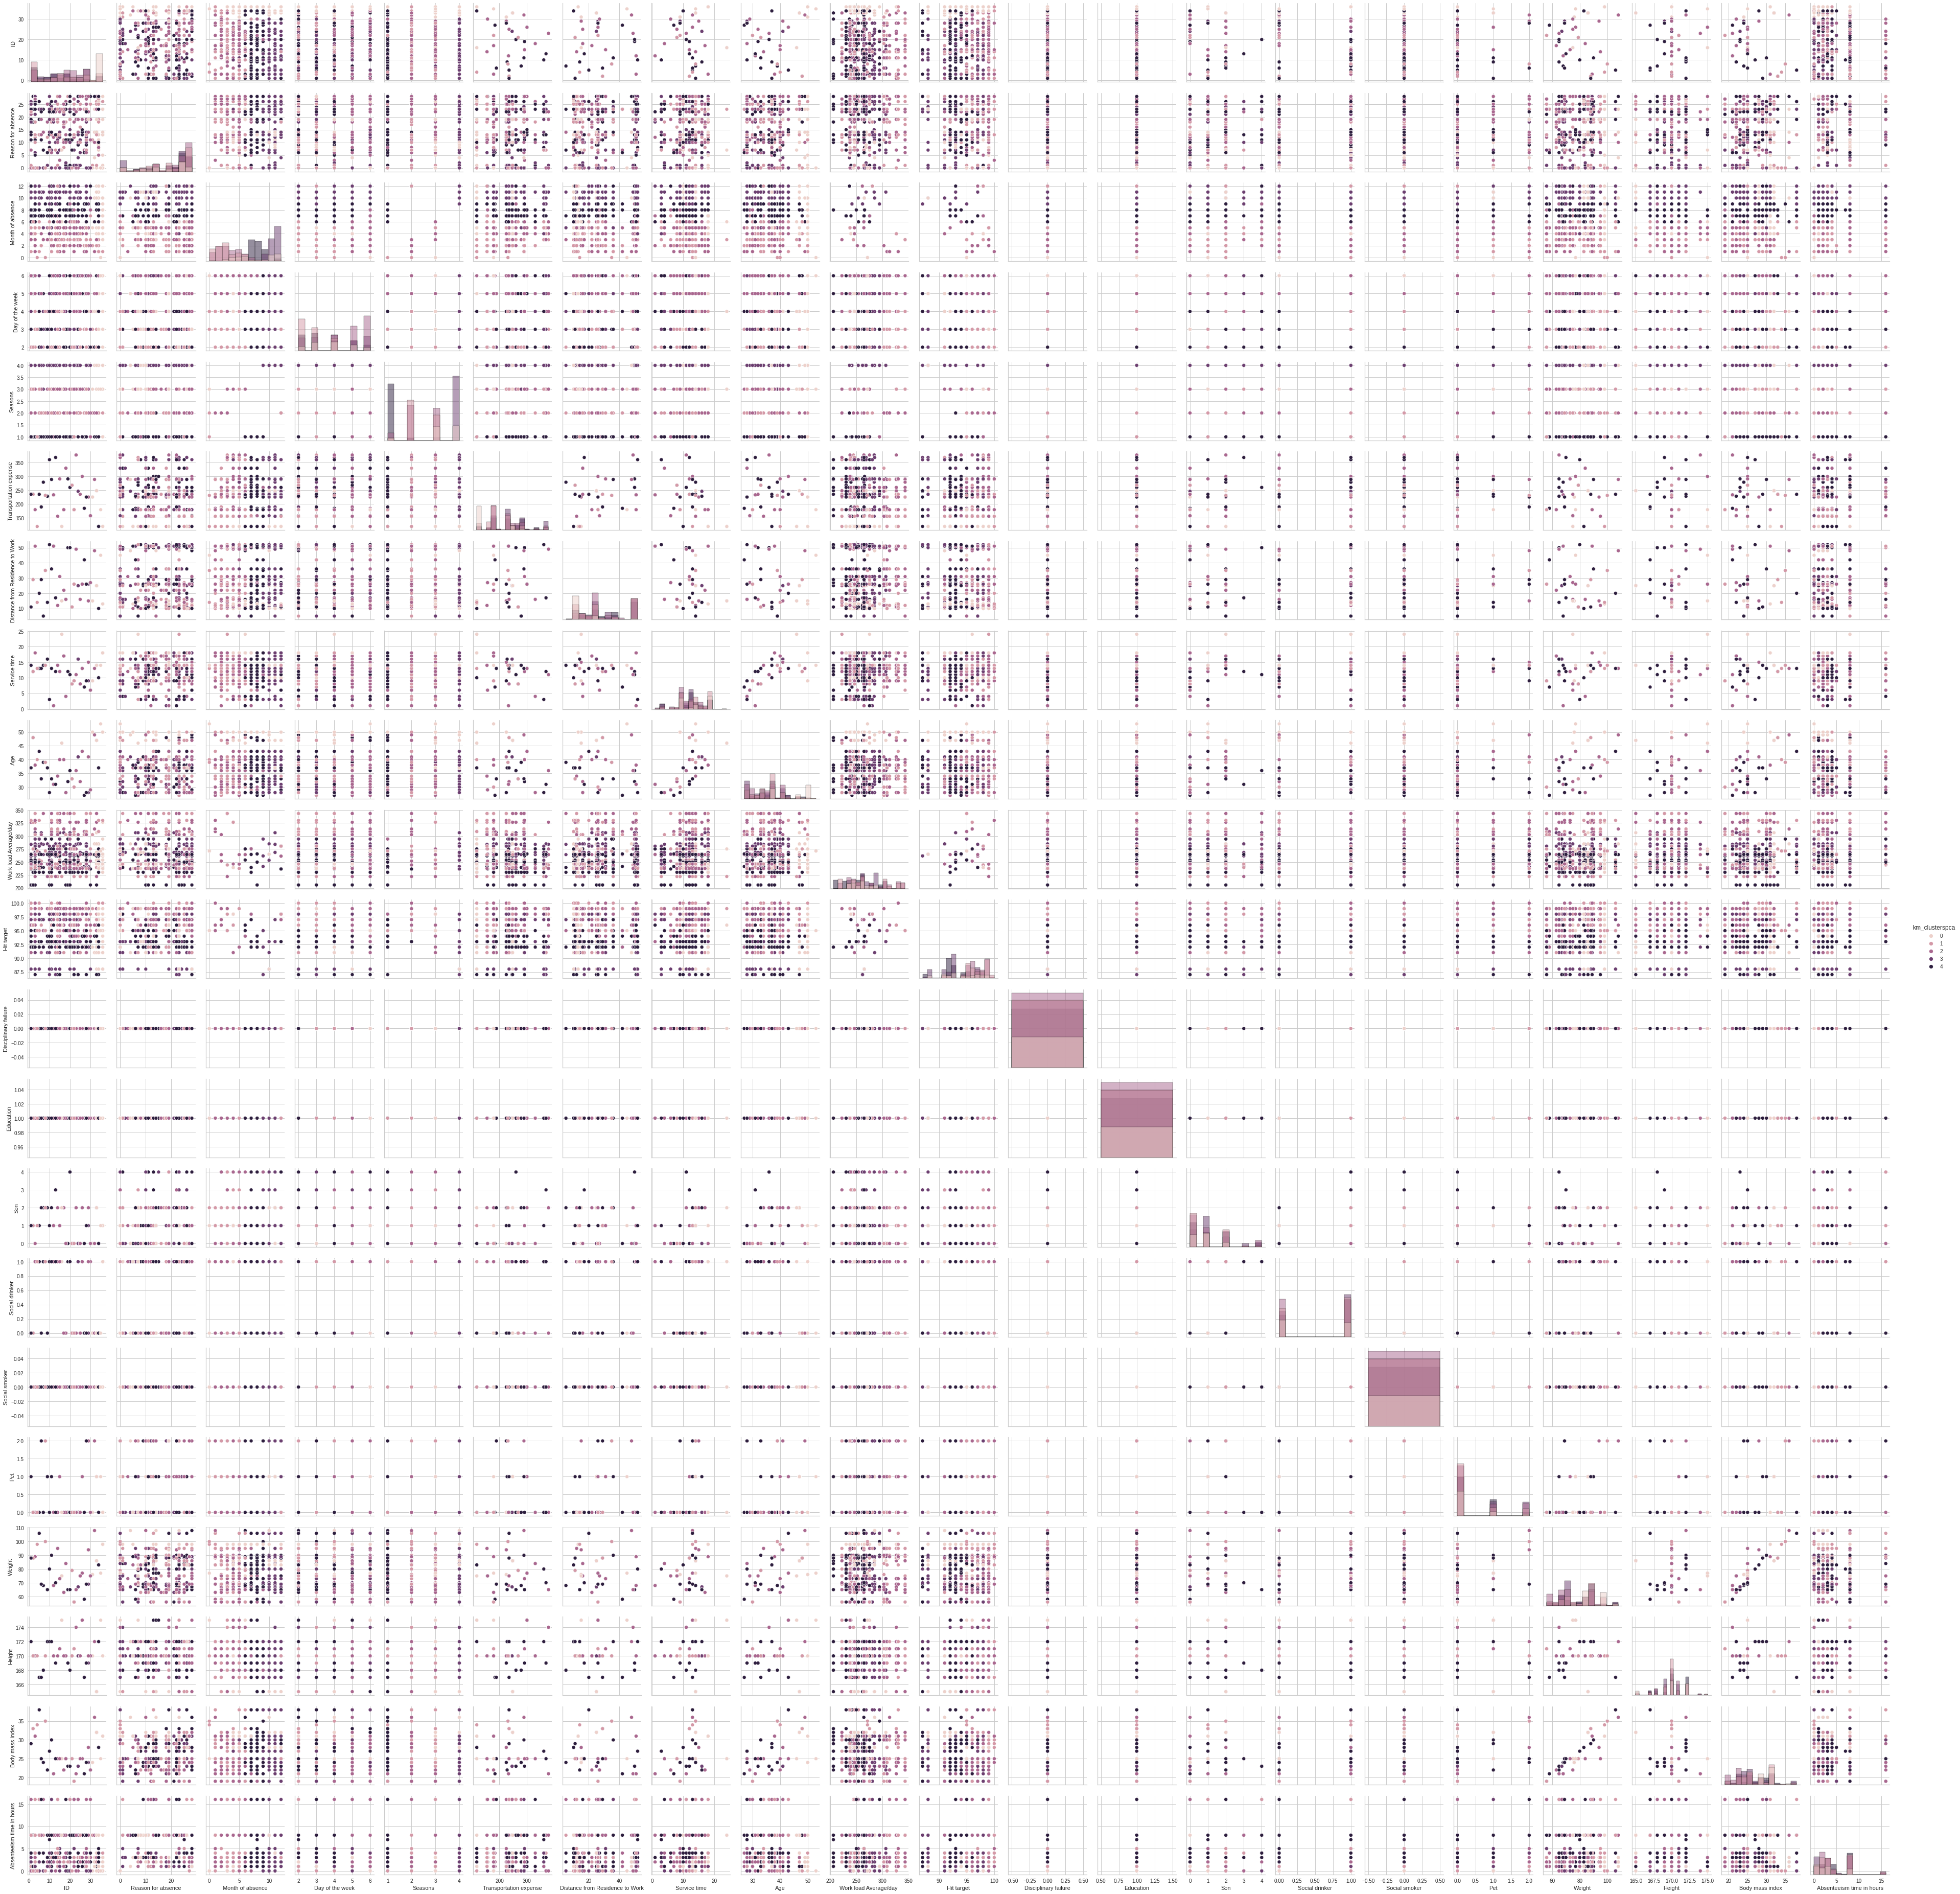

In [399]:
sns.pairplot(new_df3, hue='km_clusterspca', diag_kind = 'hist')

In [400]:
import plotly.express as px

x = new_df3.loc[:,'Social drinker']
y = new_df3.loc[:,'Body mass index']
z = new_df3.loc[:,'Month of absence']

fig = px.scatter_3d(x = x,y= y, z =  z , color = new_df3['km_clusterspca'])
fig.update_layout(scene = dict(
                    xaxis_title='Social drinker',
                    yaxis_title='Body mass index',
                    zaxis_title='Month of absence'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()

x1 = new_df3.loc[:,'Reason for absence']
y1 = new_df3.loc[:,'Absenteeism time in hours']
z1 = new_df3.loc[:,'Month of absence']

fig1 = px.scatter_3d(x = x1,y= y1, z =  z1 , color = new_df3['km_clusterspca'])
fig1.update_layout(scene = dict(
                    xaxis_title='Reason for absence',
                    yaxis_title='Absenteeism time in hours',
                    zaxis_title='Month of absence'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig1.show()

# x2 = new_df_hc_pca.iloc[:,0]
# y2 = new_df_hc_pca.iloc[:,3]
# z2 = new_df_hc_pca.iloc[:,4]

In [402]:
new_df_km_pca.head()

0         1         2         3         4  clusterspca
0  0.489064  0.281657 -0.292219 -0.110746  0.173363            4
1  0.450683  0.175601  0.616339  0.550006  0.452200            0
2  0.525348  0.118633 -0.353075  0.262865  0.148118            4
3  0.422179 -0.230116 -0.455651 -0.079073  0.225913            4
4  0.426629 -0.166005 -0.447812  0.017389  0.228293            4

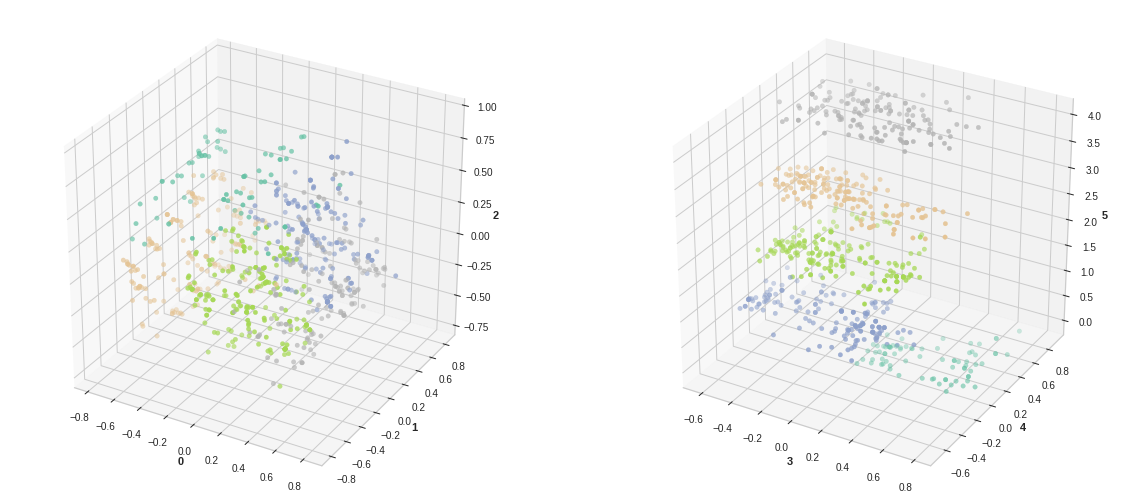

In [403]:


x = new_df_km_pca.iloc[:,0]
y = new_df_km_pca.iloc[:,1]
z = new_df_km_pca.iloc[:,2]

x1 = new_df_km_pca.iloc[:,3]
y1 = new_df_km_pca.iloc[:,4]
z1 = new_df_km_pca.iloc[:,5]

# x2 = new_df_km_pca.iloc[:,0]
# y2 = new_df_km_pca.iloc[:,3]
# z2 = new_df_km_pca.iloc[:,4]

# Creating figure
fig = plt.figure(figsize = (20, 9))
ax1 = fig.add_subplot(121,projection ="3d")
ax2 = fig.add_subplot(122,projection ="3d")
#ax3 = fig.add_subplot(133,projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating plot

ax1.scatter3D(x, y, z ,c = new_df_km_pca['clusterspca'] , cmap = 'Set2' )

ax2.scatter3D(x1, y1, z1 ,c = new_df_km_pca['clusterspca'] , cmap = 'Set2' )

#ax3.scatter3D(x2, y2, z2 ,c = new_df_hc_pca['clusterspca'] , cmap = 'Set2' )
 

ax1.set_xlabel('0', fontweight ='bold')
ax1.set_ylabel('1', fontweight ='bold')
ax1.set_zlabel('2', fontweight ='bold')

ax2.set_xlabel('3', fontweight ='bold')
ax2.set_ylabel('4', fontweight ='bold')
ax2.set_zlabel('5', fontweight ='bold')

# ax3.set_xlabel('0', fontweight ='bold')
# ax3.set_ylabel('3', fontweight ='bold')
# ax3.set_zlabel('4', fontweight ='bold')



# show plot
plt.show()

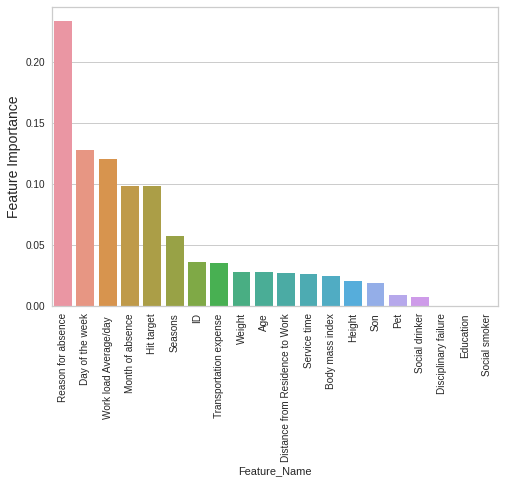

In [414]:
sns.barplot(x = df_fea_2['Feature_Name'] , y = df_fea_2['Feature Importance'])
plt.xticks(rotation = 90);
plt.ylabel('Feature Importance' , fontsize = 14);

In [416]:
new_df3.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Education  Son  Social drinker  Social smoker  \
0                 239.554  ...          1    2               1              0   
1                 239.554  ...          1    1               1              0   
2                 239.554  ...          1    0               1              0   
3                 239.554  ...          1    2               1              0   
4                 239.554  ...          1    2               1              0   

   Pet  Weight  Height  Body mass index  Absenteeism time in hours  \
0    1      90     172               30                          4   
1    0      98     170               31                          0   
2    0      89     170               31                          2   
3    0      68     168               24                          4   
4    1      90     172               30                          2   

   km_clusterspca  
0               4  
1               0  
2               4  
3               4  
4               4  

[5 rows x 22 columns]

In [425]:
for i in np.unique(new_df3['km_clusterspca']):

    print(f'\n Cluster {i}')
    print('\n-------------------------------------------------------------------------------------')
    print('%1s , %8s, %6s , %10s, %4s , %3s'%('ID','ROA','MOA','Work_load','Hit_tar','Son'))
    print(np.array(new_df3[new_df3['km_clusterspca'] == i].loc[:,['ID','Reason for absence','Month of absence','Work load Average/day ','Hit target','Seasons']]))
    print('\n======================================================================================')


 Cluster 0

-------------------------------------------------------------------------------------
ID ,      ROA,    MOA ,  Work_load, Hit_tar , Son
[[ 36.      0.      7.    239.554  97.      1.   ]
 [ 34.     23.      9.    241.476  92.      4.   ]
 [ 36.      0.      9.    241.476  92.      4.   ]
 [ 33.     23.      9.    241.476  92.      4.   ]
 [ 34.     23.     10.    253.465  93.      4.   ]
 [ 36.      0.     10.    253.465  93.      4.   ]
 [ 34.     23.     10.    253.465  93.      4.   ]
 [ 33.     23.     10.    253.465  93.      4.   ]
 [ 33.     28.     11.    306.345  93.      4.   ]
 [ 33.     23.     12.    261.306  97.      4.   ]
 [ 34.     19.     12.    261.306  97.      4.   ]
 [ 36.     23.     12.    261.306  97.      4.   ]
 [ 34.     19.     12.    261.306  97.      4.   ]
 [ 34.     27.     12.    261.306  97.      4.   ]
 [ 36.     23.      4.    326.452  96.      3.   ]
 [ 31.      0.      5.    264.249  92.      3.   ]
 [ 36.     13.      5.    264.249  

# INTERPRETATION


1. K-Means Clustering is giving best silhouette score.


2. Top Five Contributors For the Absentism of Employees as listed below

    - Reason for absence
    - Month of absence
    - Work load Average/day
    - Hit target
    - Seasons 
    

In [426]:
df_fea_2.to_csv('plot.csv')

In [ ]:
# new_df_km_clusterspca

# new_df_km_clustersNone

# new_df_hc_clusterspca

# new_df_hc_clustersNone

# new_df_db_clusterspca

# new_df_db_clustersNone